<a href="https://colab.research.google.com/github/Emmaculate2020/WK6-IP-SUPERVISED-LEARNING/blob/master/WK6_Data_Science_Core_Independent_Project_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Question


> A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly. We are going to do this with the following models:

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.



### b) Defining the Metric for Success
1. Predicting the home team goals given different independent variables using different regression modelas and testing for accuracy.
2. Predicting the away team goals given different independet variables using different models and testing for accuracy as well.

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [0]:
# Loading the Dataset and necessary libraries
# 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import pandas.util.testing as tm
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

df1 = pd.read_csv('fifa_ranking.csv')
df2 = pd.read_csv('results.csv')

In [0]:
# Renaming country_full column on fifa ranking dataset before merging
#

df1.rename(columns = {'rank_date': 'date'}, inplace = True)

In [0]:
# We merge the two datasets to get one whole dataset with all the information we want
#

combined = pd.merge(df1, df2, on='date', how='inner')

## 3. Checking the Data

In [36]:
# Determining the no. of records in our dataset
#

combined.shape

(212831, 24)

In [37]:
# Previewing the top of our dataset
#

combined.head()

,rank,country_x,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country_y,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False


In [38]:
# Previewing the bottom of our dataset
# 

combined.tail()

,rank,country_x,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country_y,neutral
212826,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,Abkhazia,United Koreans in Japan,2,0,CONIFA World Football Cup,Bromley,England,True
212827,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,Barawa,Panjab,0,5,CONIFA World Football Cup,Sutton,England,False
212828,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,Bromley,England,True
212829,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,Carshalton,England,True
212830,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True


In [39]:
# Checking whether each column has an appropriate datatype
#

combined.dtypes

rank                         int64
country_x                   object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
date                        object
home_team                   object
away_team                   object
home_score                   int64
away_score                   int64
tournament                  object
city                        object
country_y                   object
neutral                       bool
dtype: object

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

In [40]:
combined.columns

Index(['rank', 'country_x', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country_y', 'neutral'],
      dtype='object')

In [41]:
combined.head(2)

,rank,country_x,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country_y,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False


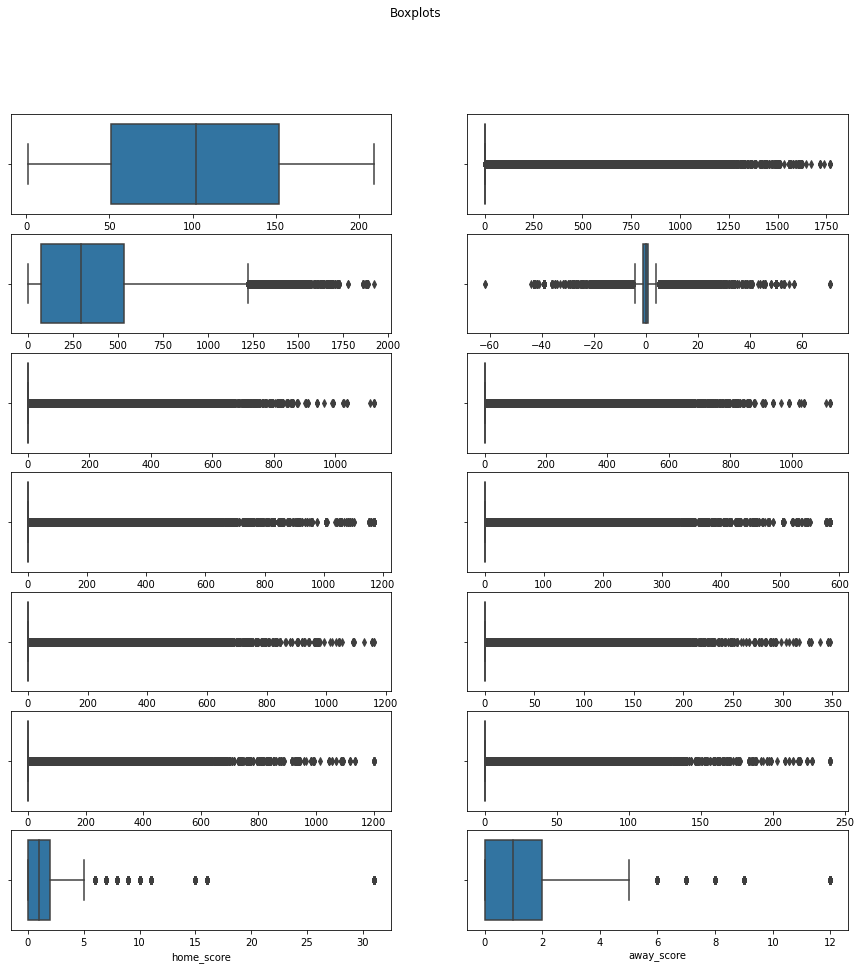

In [43]:
# Checking for Outliers
#
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7,2, figsize=(15, 15))
fig.suptitle('Boxplots')

sns.boxplot(combined['rank'], ax=ax1)
sns.boxplot(combined['total_points'], ax=ax2)
sns.boxplot(combined['previous_points'], ax=ax3)
sns.boxplot(combined['rank_change'], ax=ax4)
sns.boxplot(combined['cur_year_avg'], ax=ax5)
sns.boxplot(combined['cur_year_avg_weighted'], ax=ax6)
sns.boxplot(combined['last_year_avg'], ax=ax7)
sns.boxplot(combined['last_year_avg_weighted'], ax=ax8)
sns.boxplot(combined['two_year_ago_avg'], ax=ax9)
sns.boxplot(combined['two_year_ago_weighted'], ax=ax10)
sns.boxplot(combined['three_year_ago_avg'], ax=ax11)
sns.boxplot(combined['three_year_ago_weighted'], ax=ax12)
sns.boxplot(combined['home_score'], ax=ax13)
sns.boxplot(combined['away_score'], ax=ax14)
plt.show()

In [44]:
# Getting ouliers from our dataframe using a z-test
#
numeric = combined[['rank','total_points','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted','last_year_avg',
                    'last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted',
                    'three_year_ago_avg','three_year_ago_weighted','home_score','away_score']]

from scipy import stats
z = np.abs(stats.zscore(numeric))
print(z)


[[1.71993775 0.25987631 0.96321448 ... 0.24562647 0.66897049 0.03739112]
 [1.71993775 0.25987631 0.96321448 ... 0.24562647 0.34624341 0.03739112]
 [1.71993775 0.25987631 0.96321448 ... 0.24562647 1.68418439 0.83239512]
 ...
 [1.77567766 0.25987631 1.15638182 ... 0.24562647 1.17657744 0.83239512]
 [1.77567766 0.25987631 1.15638182 ... 0.24562647 0.66897049 0.75761288]
 [1.77567766 0.25987631 1.15638182 ... 0.24562647 1.17657744 0.75761288]]


In [46]:
# Dropping and Confirming that our outliers have been dropped from the dataset.
#
new_df= numeric[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {numeric.shape[0]}")
print(f"New dataframe size: {new_df.shape[0]}")

Previous dataframe size : 212831
New dataframe size: 190808


In [47]:
# Identifying the Missing Data
#

combined.isnull().sum()

# From the output we find that there are no missing values from our dataset

rank                       0
country_x                  0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country_y                  0
neutral                    0
dtype: int64

In [48]:
# More data cleaning procedures
# checking for duplicates

combined.duplicated()

# there are no duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
212826    False
212827    False
212828    False
212829    False
212830    False
Length: 212831, dtype: bool

## 6. Exploratory Analysis

In [49]:
combined.head(2)

,rank,country_x,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country_y,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False


In [51]:
# Dropping unnecessary columns
combined = combined.drop(['country_abrv','date','country_x','country_y','confederation','city','neutral'], axis = 1)
combined.head(2)

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament
0,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bolivia,Uruguay,3,1,FIFA World Cup qualification
1,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,Mexico,1,1,Friendly


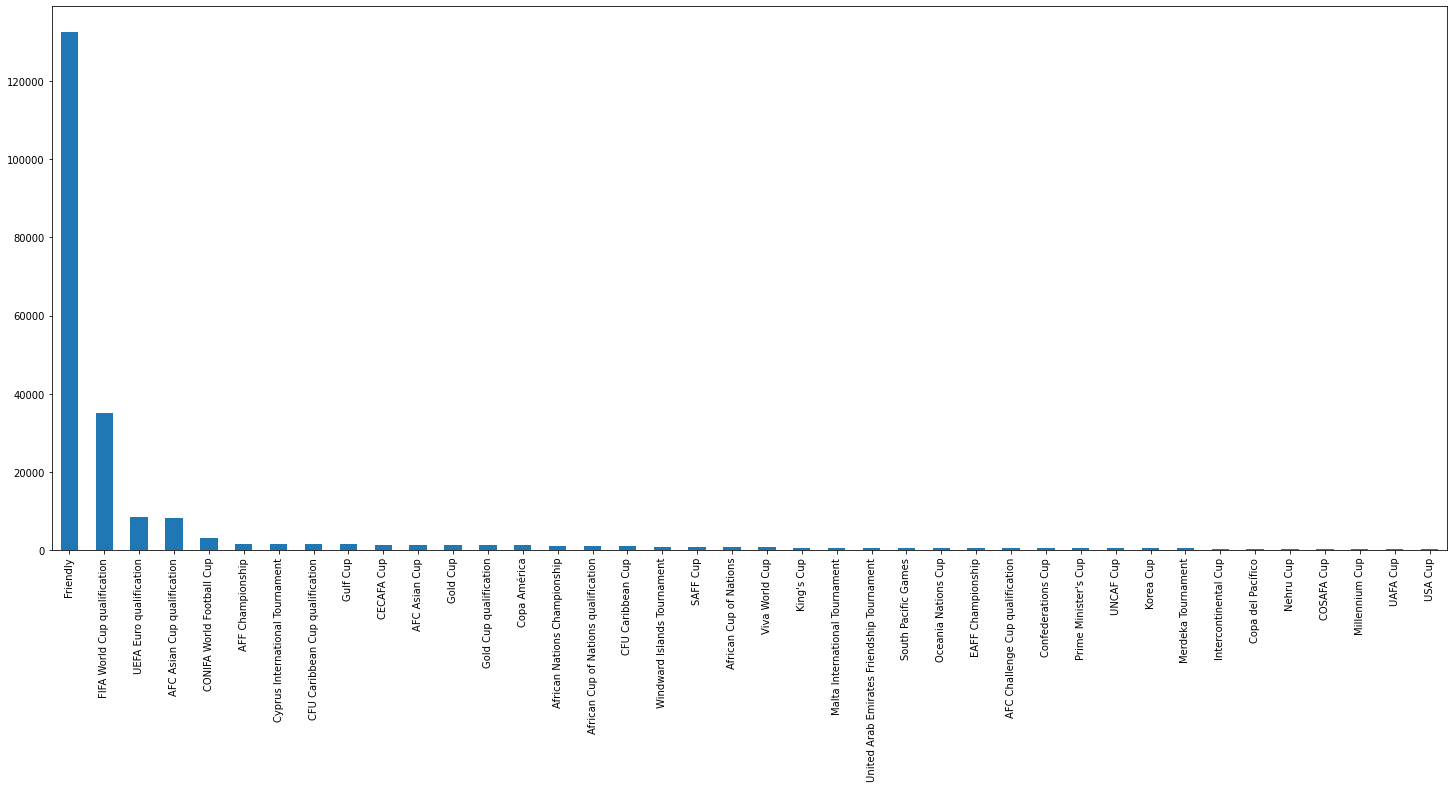

In [102]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(25,10))
combined['tournament'].value_counts().plot.bar()

From the above barplot we deduce that friendly tournaments make the majority of tournaments played with USA cup being the least. This is because most teams tend to measure their strength through friendly matches before going for main matches.

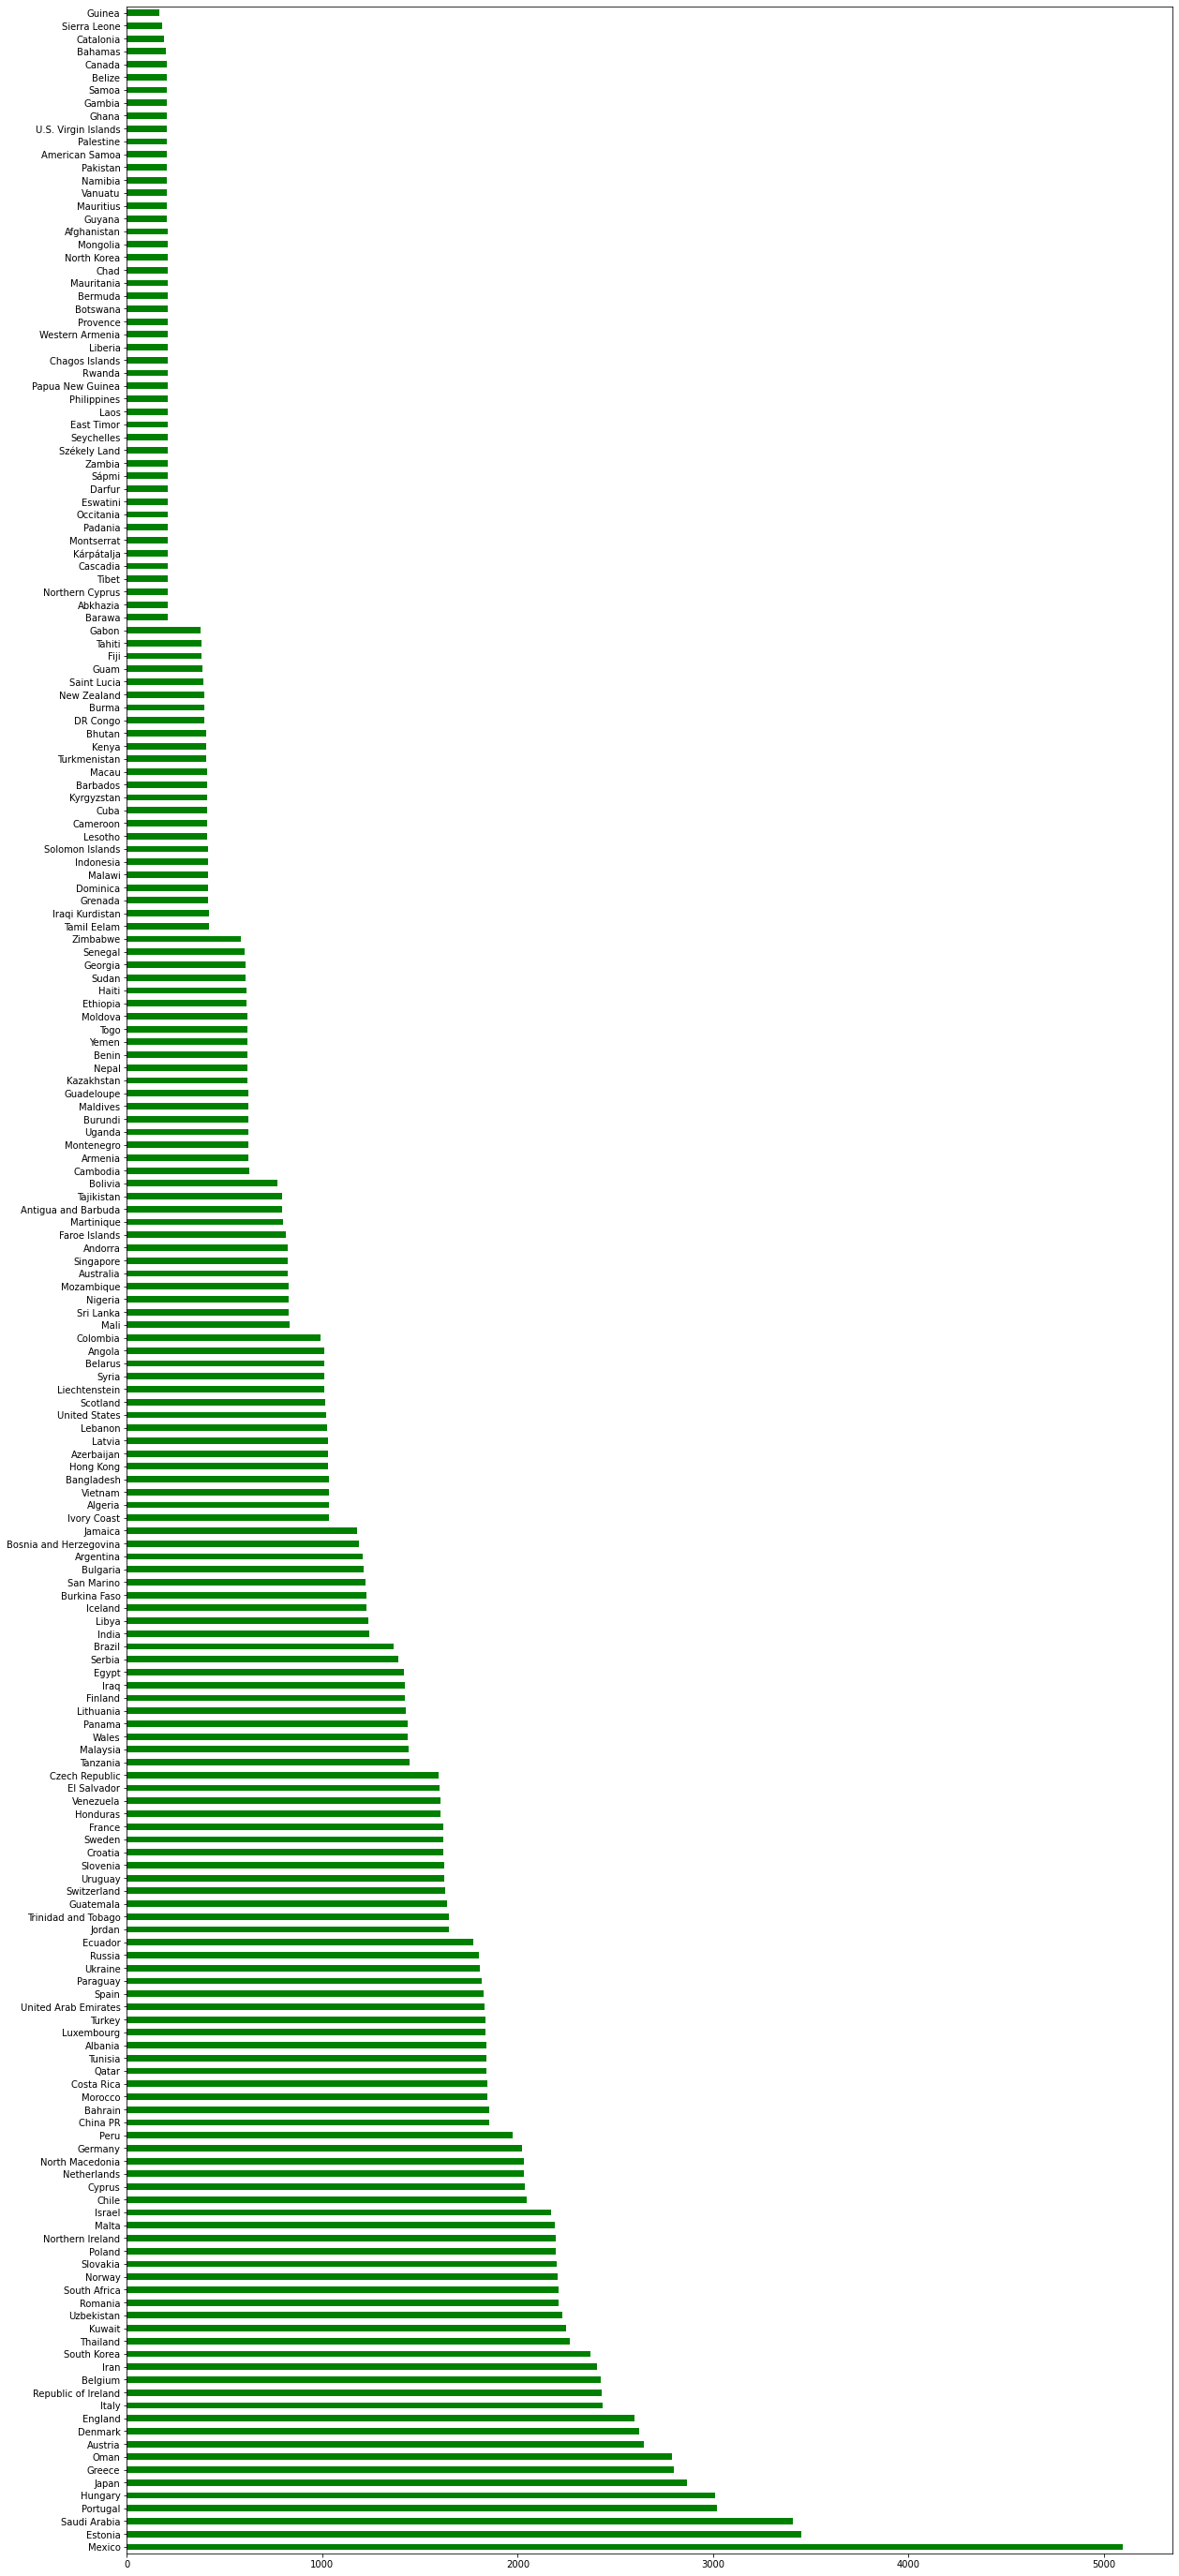

In [74]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize=(20,50))
combined['home_team'].value_counts().plot.barh(color = 'green')

From here we observe that Mexico team hosted the highest number of games compared to any other team with Guinea hosting the least number of games.

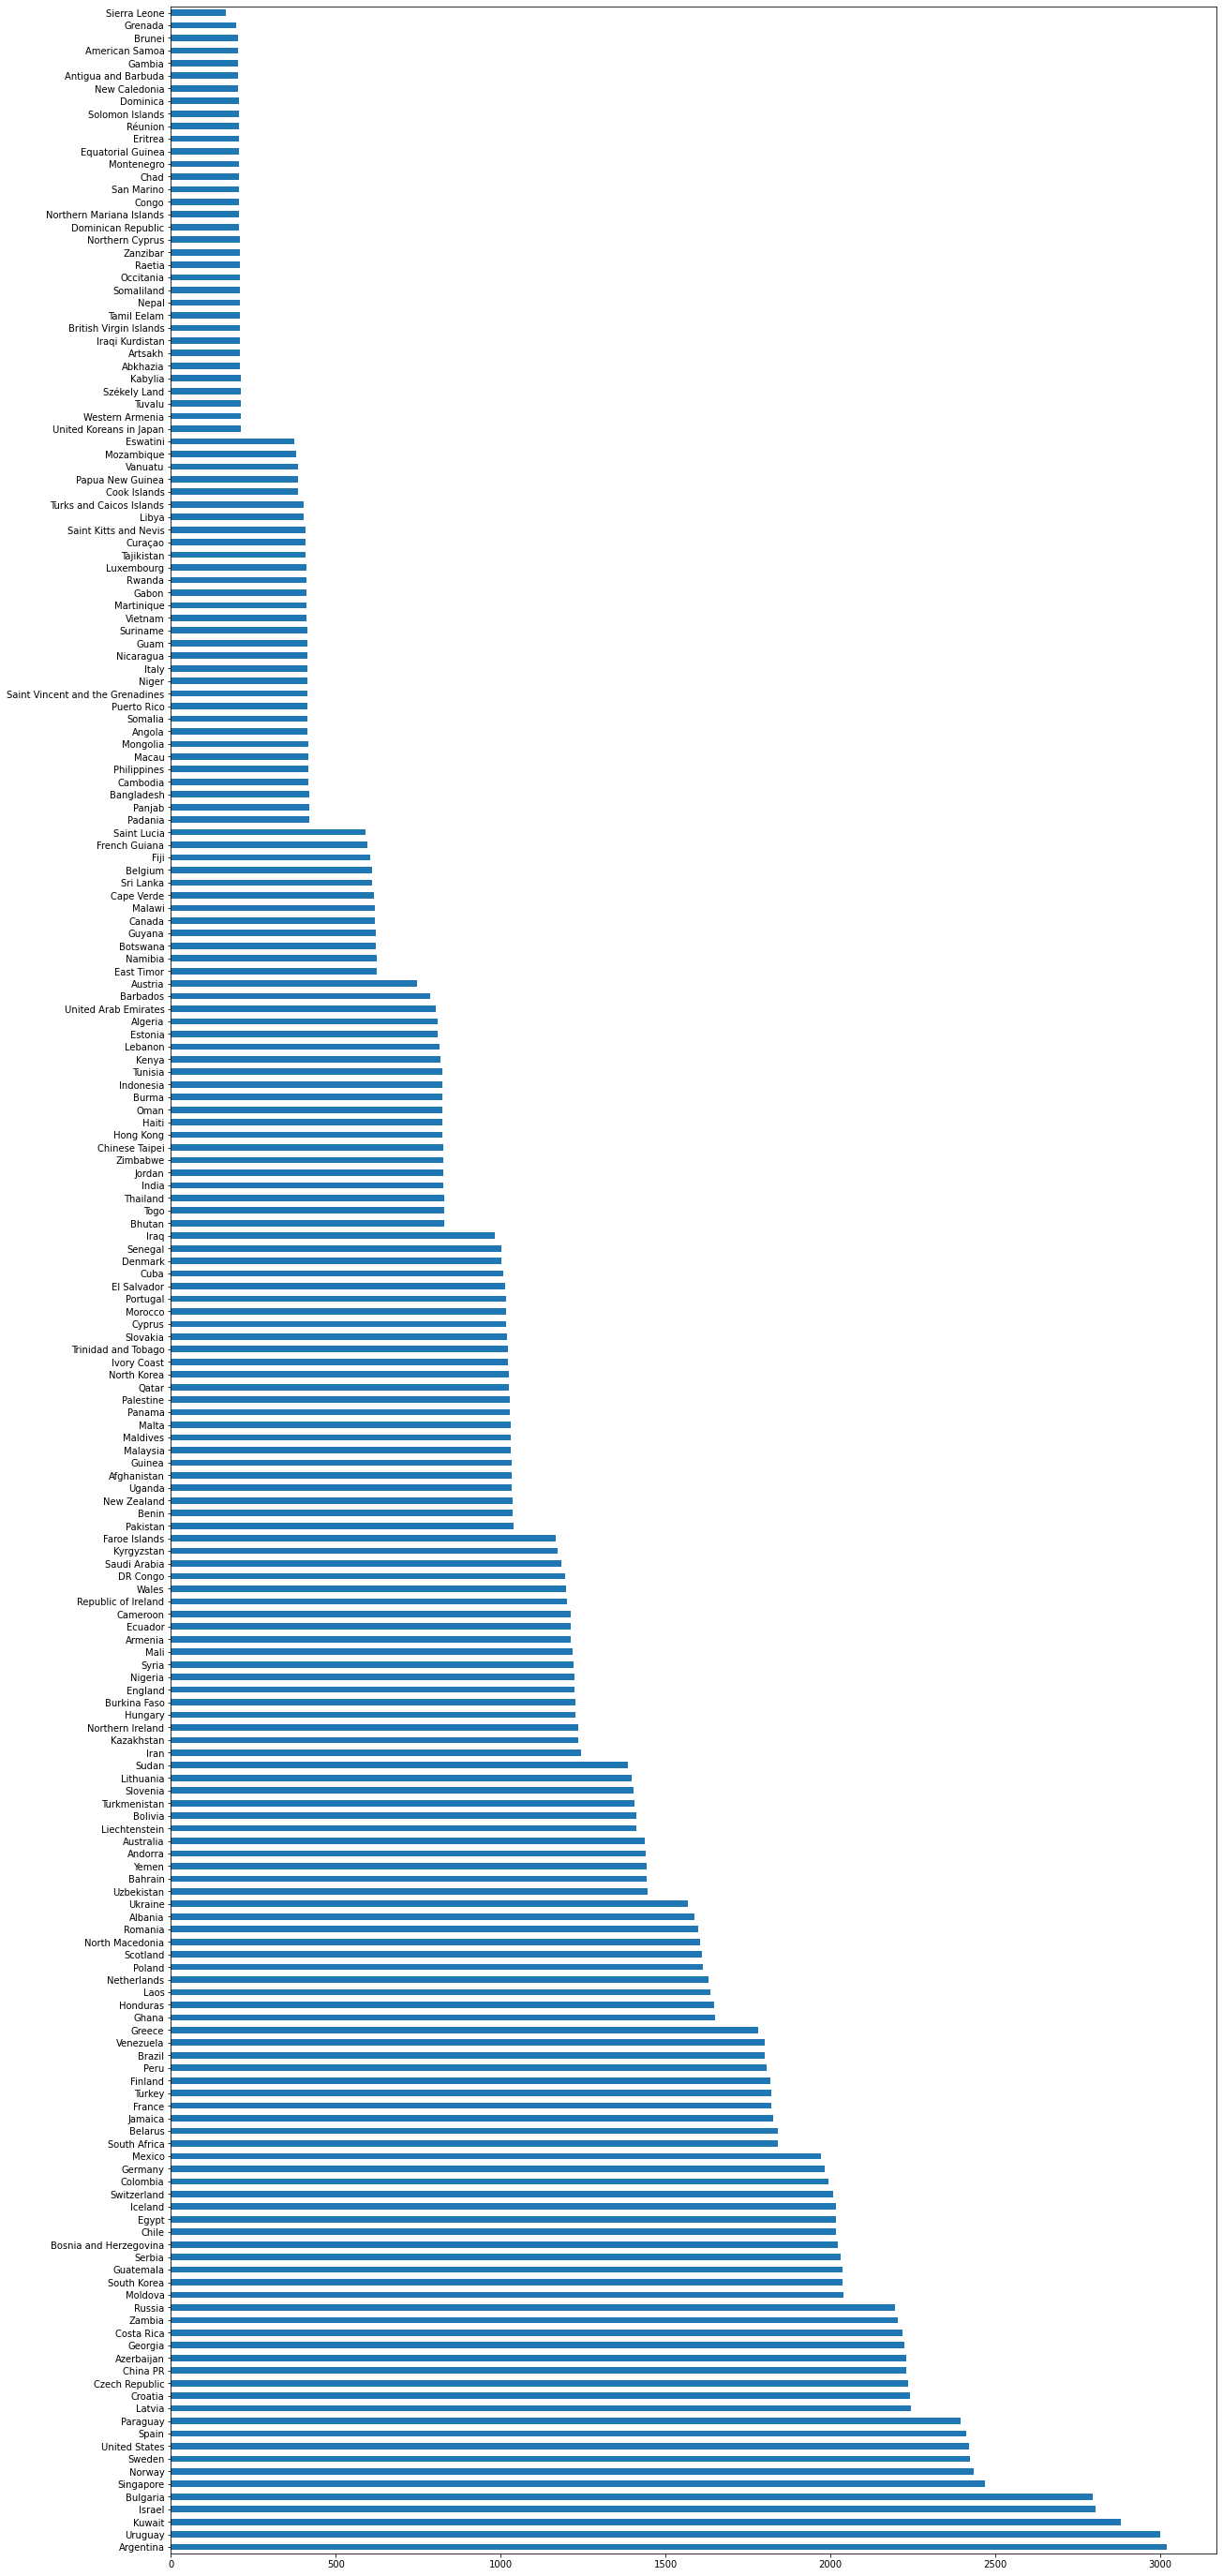

In [60]:
plt.figure(figsize=(20,50))
combined['away_team'].value_counts().plot.barh()

This bar plot show that Argentina plays away from home mostly compared to every other team.

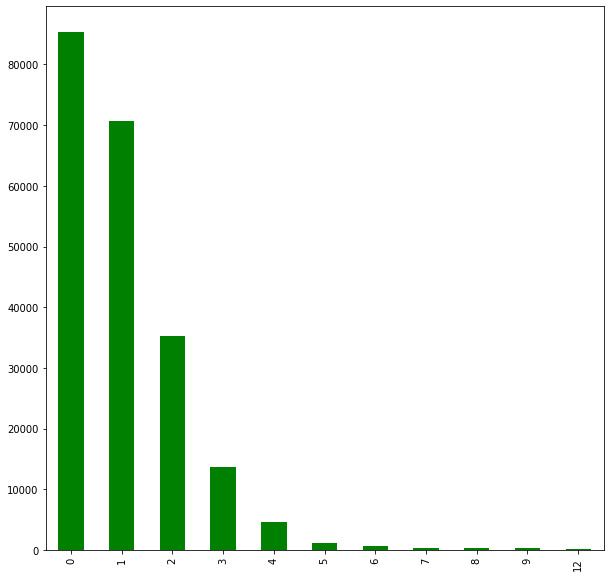

In [73]:
plt.figure(figsize=(10,10))
combined['away_score'].value_counts().plot.bar(color = 'green')

The above barplot show that most teams that play away from home mostly score zero with very few scoring upto 12goals.

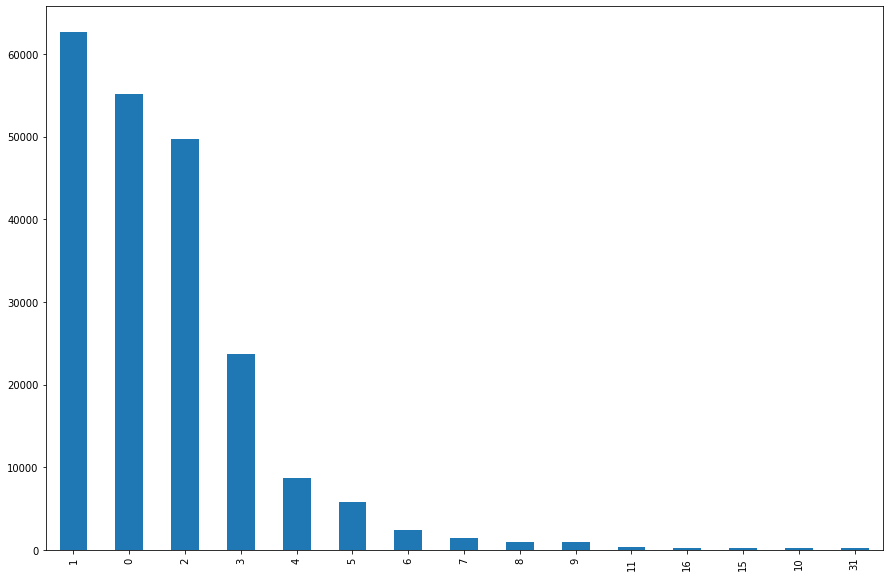

In [72]:
plt.figure(figsize=(15,10))
combined['home_score'].value_counts().plot.bar()

The above bar graph show that most teams that play at home mostly score one goals with very few scoring up to 31 goals.

# Polynomial Regression

In [136]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
combined["home_team_code"] = lb_make.fit_transform(combined["home_team"])
combined[["home_team", "home_team_code"]].head()

,home_team,home_team_code
0,Bolivia,24
1,Brazil,27
2,Ecuador,52
3,Guinea,73
4,Paraguay,138


In [137]:
lb_make = LabelEncoder()
combined["away_team_code"] = lb_make.fit_transform(combined["away_team"])
combined[["away_team", "away_team_code"]].head()

,away_team,away_team_code
0,Uruguay,191
1,Mexico,110
2,Venezuela,194
3,Sierra Leone,159
4,Argentina,8


In [138]:
lb_make = LabelEncoder()
combined["tournament_code"] = lb_make.fit_transform(combined["tournament"])
combined[["tournament", "tournament_code"]].head()

,tournament,tournament_code
0,FIFA World Cup qualification,17
1,Friendly,18
2,FIFA World Cup qualification,17
3,Friendly,18
4,FIFA World Cup qualification,17


## HOME TEAM

In [0]:
# Importing necessary libraries for polynomial regression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [147]:
combined.head(2)

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,home_team_code,away_team_code,tournament_code
0,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,24,191,17
1,1,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brazil,Mexico,1,1,Friendly,27,110,18


In [0]:
# Split the data into features and labels
X = combined.drop(["home_score","home_team","away_team","tournament","previous_points", 'total_points', 
                    'rank_change','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                   'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
y = combined['home_score']

In [0]:
# Split into Training and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [0]:
# Fit the Independet Variables to a Polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
Xtrain_poly = poly_reg.fit_transform(X_train)
Xtest_poly = poly_reg.fit_transform(X_test)

In [171]:
pol_reg = LinearRegression()
pol_reg.fit(Xtrain_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [186]:
# We get the predictions as an array
poly_predic = pol_reg.predict(poly_reg.fit_transform(X_test))
print(poly_predic )

[0.80208219 1.86967992 0.91601688 ... 0.70010008 1.02778152 0.94574032]


In [189]:
from sklearn import metrics

poly_predic = pol_reg.predict(poly_reg.fit_transform(X_test))

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_predic))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_predic))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_predic))) 

Mean Absolute Error: 0.8692866401959033
Mean Squared Error: 1.5003129912295907
Root Mean Squared Error: 1.2248726428611223


We get a RMSE of 1.22 showing that our module is quite efficient for our prediction.

## AWAY TEAM

In [0]:
# We are going to plot the relationship between away team scores and other columns
# Split the data into features and labels
X = combined.drop(["away_score","home_team","away_team","tournament","previous_points", 'total_points', 
                    'rank_change','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                   'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
y = combined['away_score']

In [0]:
# Split into Training and Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [0]:
# Fit the Independet Variables to a Polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
Xtrain_poly = poly_reg.fit_transform(X_train)
Xtest_poly = poly_reg.fit_transform(X_test)

In [183]:
pol_reg = LinearRegression()
pol_reg.fit(Xtrain_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
# We get the predictions as an array
poly_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
print(poly_pred )

[0.80208219 1.86967992 0.91601688 ... 0.70010008 1.02778152 0.94574032]


In [188]:
from sklearn import metrics

poly_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, poly_pred))) 

Mean Absolute Error: 0.8692866401959033
Mean Squared Error: 1.5003129912295907
Root Mean Squared Error: 1.2248726428611223


We get a RMSE of 1.22 showing that our module is quite efficient for our prediction.

# Logistic Regression

## HOME TEAM

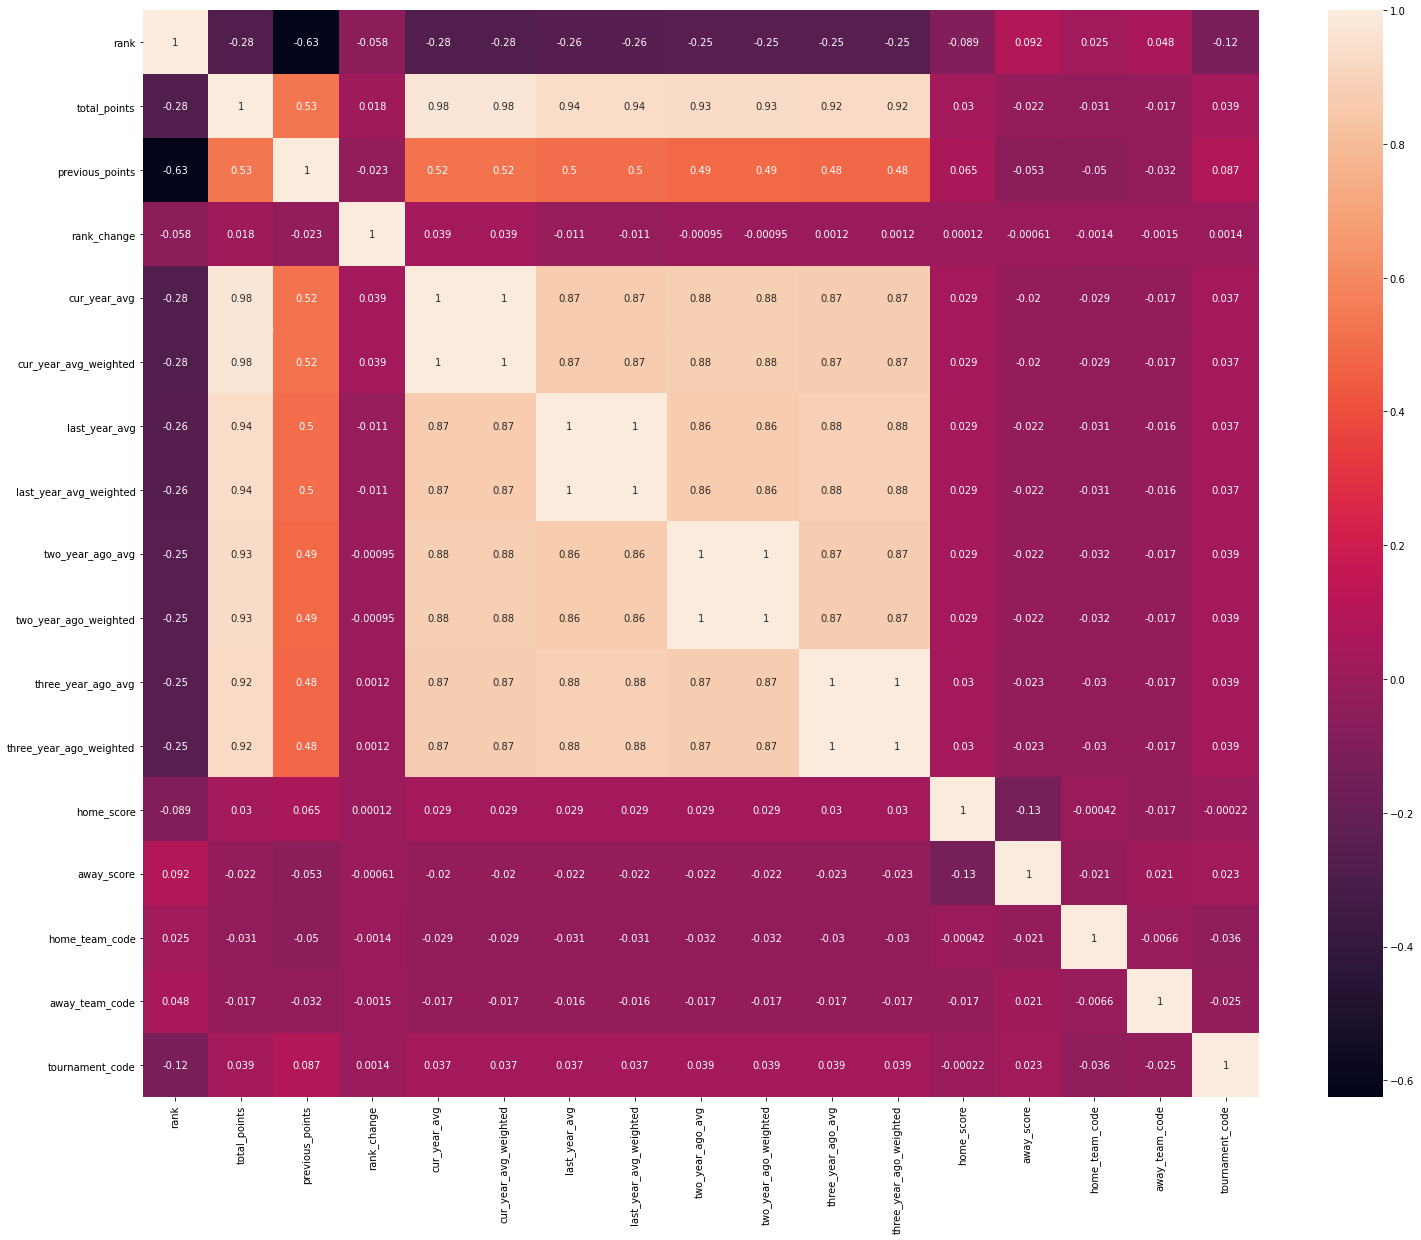

In [0]:
# Plotting a heatmap to determine how independent the variables are

plt.figure(figsize=(25,20))

sns.heatmap(combined.corr(),annot=True)

From the heat map we observe that previous points and rank columns are not independent of each other, but since we need the rank column for our model, we are going to drop previous points columns along with other columns as in the next cell.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Splitting our dataset
#
X = combined.drop(["home_score","home_team","away_team","tournament","previous_points", 'total_points', 
                    'rank_change','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                   'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
y = combined["home_score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

We drop all the columns we will not need for our analysis, the we split the rmaining data into training and test sets

In [85]:
X.head()

,rank,away_score,home_team_code,away_team_code,tournament_code
0,1,1,24,191,17
1,1,1,27,110,18
2,1,0,52,194,17
3,1,0,73,159,18
4,1,3,138,8,17


In [86]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [90]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[3912,    0, 4852,    0,    0,    0,    0,  927,    0,  655,   76,
        3085,    3,    0, 2970],
       [3561,    0, 6587,    0,    0,    0,    0,  948,    0,  399,  251,
        2901,    0,    0, 4218],
       [2086,    0, 4850,    4,    0,    0,    0,  828,    0,  480,  107,
        2847,    1,    0, 3612],
       [1149,    0, 2411,    0,    0,    0,    0,  363,    0,  412,   81,
        1042,    0,    0, 1635],
       [ 426,    0,  833,    0,    0,    0,    0,  249,    0,  170,   40,
         333,    0,    0,  611],
       [ 152,    0,  497,    0,    0,    0,    0,    0,    0,  173,   30,
         490,    0,    0,  420],
       [ 126,    0,  127,    0,    0,    0,    8,  115,    0,   59,   16,
         139,    0,    0,  171],
       [   0,    0,   69,    0,    0,    0,    0,   89,    0,   35,    0,
          78,    0,    0,  172],
       [  60,    0,  168,    0,    0,    0,    0,    0,    0,    0,    0,
          68,    0,    0,    0],
       [   0,    0,    0,    0,    0,

In [97]:
from sklearn import metrics

y_pred = LogReg.predict(X_test)

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 9.254659357870008
Mean Squared Error: 208.65954581049334
Root Mean Squared Error: 14.445052641319565


From the RMSE results, our accuracy is at about 14%

In [0]:
# Getting the predicted home scores

y_pred = LogReg.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

In [108]:
# Use score method to get accuracy of model
score = LogReg.score(X_test, y_test)
print(score)

# Accuracy is at 14%

0.14288175411119813


#### Our logistic Regression model yields an accuracy of 14% which is very low

## AWAY TEAM

In [0]:
# In this case our dependent variable will be the away score
# Splitting our dataset
#
x = combined.drop(['away_score',"home_team","away_team","tournament","previous_points", 'total_points', 
                    'rank_change','cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                   'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted'],axis=1)
Y = combined["away_score"]

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = .3, random_state=25)

In [129]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(x_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction
#
Y_pred = LogReg.predict(x_test)

In [131]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[18926,  6416,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [15150,  6285,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 6814,  3784,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 2769,  1362,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  939,   399,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  174,   170,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  139,    69,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   62,    62,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   66,    63,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,   130,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   60,    11,     0,     0,     0,     0,     0,    

In [132]:
from sklearn import metrics

y_pred = LogReg.predict(X_test)

# Our first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

# We can also use MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  

# Finally, the most popular metric: RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))) 

Mean Absolute Error: 0.9607987470634299
Mean Squared Error: 2.2906969459671105
Root Mean Squared Error: 1.5135048549532673


In [0]:
# Getting the predicted home scores

Y_pred = LogReg.predict(x_test)

comparison_frame = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})

comparison_frame.describe()

In [134]:
# Use score method to get accuracy of model
score = LogReg.score(x_test, Y_test)
print(score)

0.39484729835552074


#### Our logistic regression model is yielding an accuracy of 39%

# Hyperparameter Tuning

### GridSearchCV

In [0]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
# Fitting Kernel SVM to the training set
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
# predicting the test set results

y_predicted = classifier.predict(X_test)

In [0]:
# making the confusion matrix

from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, y_predicted)

In [111]:
# to check for the accuracy of our score

from sklearn.metrics import accuracy_score

accuracy  = accuracy_score(y_test, y_predicted)

accuracy

# The accuracy is at 30% without using the appropiate hyperparameters

0.29895066562255285

### Applying the GridSearchCV to find the best model and the best parameters


In [0]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C' : [1,5,20,100,1000], 'kernel' : ['linear']},
              {'C' : [1,5,20,100,1000], 'kernel' : ['rbf'], 'gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)             

In [0]:
# Getting the grid search best score to get the accuracy

accuracy = grid_search.best_score_

accuracy

This gives us the accuracy of the model when we use the appropriate parameters.

In [0]:
# Getting the best parameters

grid_search.best_params_

The above are the ideal parameters which we need to use to get a higher accuracy.